In [5]:
#pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 1.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [61]:
#pip install matplotlib_venn

Note: you may need to restart the kernel to use updated packages.


# Importing necessary libraries

In [100]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib_venn import venn2
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import plotly.graph_objects as go


# Data Loading

In [22]:
# Load data
data = pd.read_csv('amazon_prime_titles.csv') 

In [26]:
data.head()

show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, International   
2  March 30, 2021          2017    NaN   74 min  Action, Drama, Suspense   
3  March 30, 2021          2014    NaN   69 min              Documentary   
4  March 30, 2021          1989    NaN   45 min           Drama, Fantasy   

                                         description  
0  A small fishing village must procure a local d...  
1  A Metro Family decides to fight a Cyber Crimin...  
2  After a man discovers his wife is cheating on ...  
3  Pink breaks the mold once again, bringing her ...  
4  Teenage Matt Banting wants to work with a famo...

In [119]:
data.describe()

release_year  overlap_size
count   9331.000000   9331.000000
mean    2008.194299      0.781588
std       19.143763      1.126932
min     1920.000000      0.000000
25%     2006.000000      0.000000
50%     2016.000000      0.000000
75%     2020.000000      1.000000
max     2021.000000      9.000000

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9331 entries, 1 to 9667
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   show_id               9331 non-null   object
 1   type                  9331 non-null   object
 2   title                 9331 non-null   object
 3   release_year          9331 non-null   int64 
 4   rating                9331 non-null   object
 5   duration              9331 non-null   object
 6   listed_in             9331 non-null   object
 7   description           9331 non-null   object
 8   title_keywords        9331 non-null   object
 9   description_keywords  9331 non-null   object
 10  overlap_size          9331 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 874.8+ KB


# Data Pre-processing

In [32]:
data.shape

(9668, 12)

In [30]:
data.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [34]:
data.drop(['date_added', 'country','director', 'cast'],axis=1,inplace=True)

In [36]:
data.dropna(inplace=True)

In [40]:
data.isna().sum()

show_id         0
type            0
title           0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Columns that contained a large amount of null values have been removed as they are not needed in text based visualization. Also remaining null values are being removed from the dataset making dataset ready to go for visualization.

In [45]:
data.head()

show_id     type                          title  release_year rating  \
1       s2    Movie           Take Care Good Night          2018    13+   
16     s17    Movie                       Zoombies          2016    13+   
17     s18  TV Show                     Zoo Babies          2008    ALL   
18     s19  TV Show  Zoë Coombs Marr: Bossy Bottom          2020    18+   
19     s20    Movie                            Zoe          2018      R   

    duration                      listed_in  \
1    110 min           Drama, International   
16    87 min        Horror, Science Fiction   
17  1 Season         Kids, Special Interest   
18  1 Season  Comedy, Talk Show and Variety   
19   104 min                Science Fiction   

                                          description  
1   A Metro Family decides to fight a Cyber Crimin...  
16  When a strange virus quickly spreads through a...  
17  A heart warming and inspiring series that welc...  
18  Zoë Coombs Marr has been on hiatus. Sort of. F...  
19  ZOE tells a tale of forbidden love between an ...

# Data Visualization

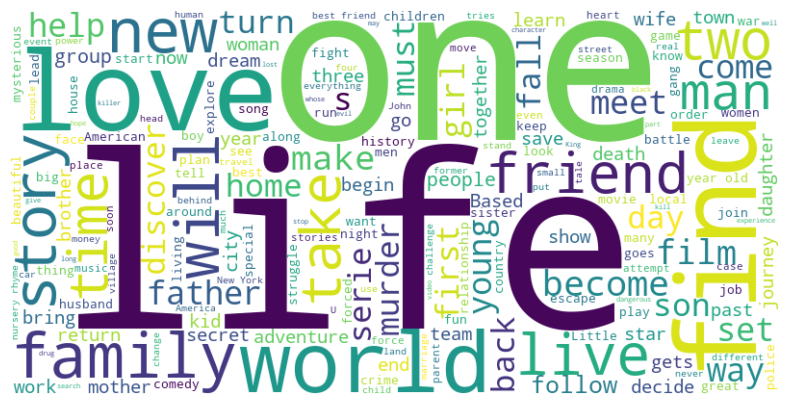

In [48]:
# Generate a word cloud image from descriptions
text = ' '.join(description for description in data['description'].astype(str))
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


This word cloud provides a visual representation of the most frequently occurring words in a dataset, likely compiled from descriptions or titles of media content such as movies or television shows. The prominence of words like "love," "family," "father," "mother," and "friend" suggests themes centered around relationships and personal dynamics. Words such as "city," "war," "death," and "murder" indicate that conflict and urban settings may also be significant elements. This visualization aids in quickly identifying common themes and topics, suggesting that the content largely explores interpersonal relationships, societal issues, and personal challenges. The word cloud facilitates a rapid understanding of the thematic emphasis of the dataset, highlighting the potential focus areas for further content analysis or development.

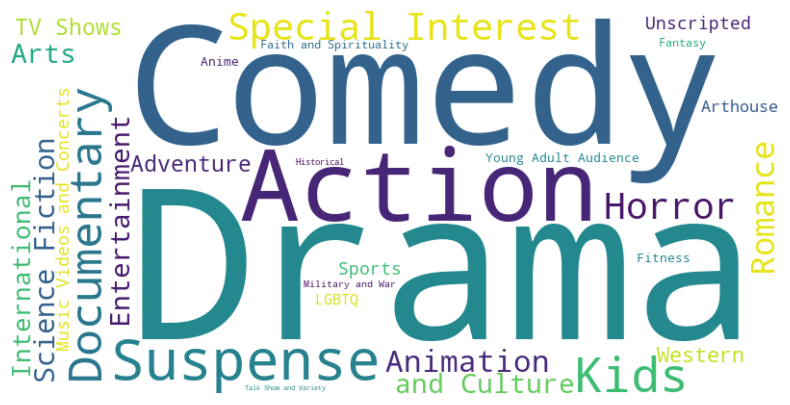

In [90]:
from collections import Counter

# Process the 'listed_in' column which contains tags separated by commas
tags = Counter([tag.strip() for sublist in data['listed_in'].dropna().str.split(',') for tag in sublist])

# Generate and display a word cloud based on these tags
tag_cloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(tags)

plt.figure(figsize=(10, 5))
plt.imshow(tag_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The visualization is a word cloud that effectively highlights the diversity of genres in a media library, arranging them by prevalence and relevance. The largest terms, such as "Action," "Drama," and "Comedy," indicate these genres are most common or prioritized within the dataset. This format allows viewers to quickly grasp the most popular or frequently occurring categories at a glance. Smaller terms, such as "LGBTQ" and "Fitness," suggest less representation but include important niche areas that cater to specific audience interests. The use of varying colors enhances readability and aesthetic appeal, although the color choice does not seem to follow a particular pattern related to genre type or other discernible criteria. Overall, this word cloud efficiently communicates the genre composition of the content, making it a useful tool for quickly understanding the breadth and diversity of available programming.

# Overlapping of Title and Description

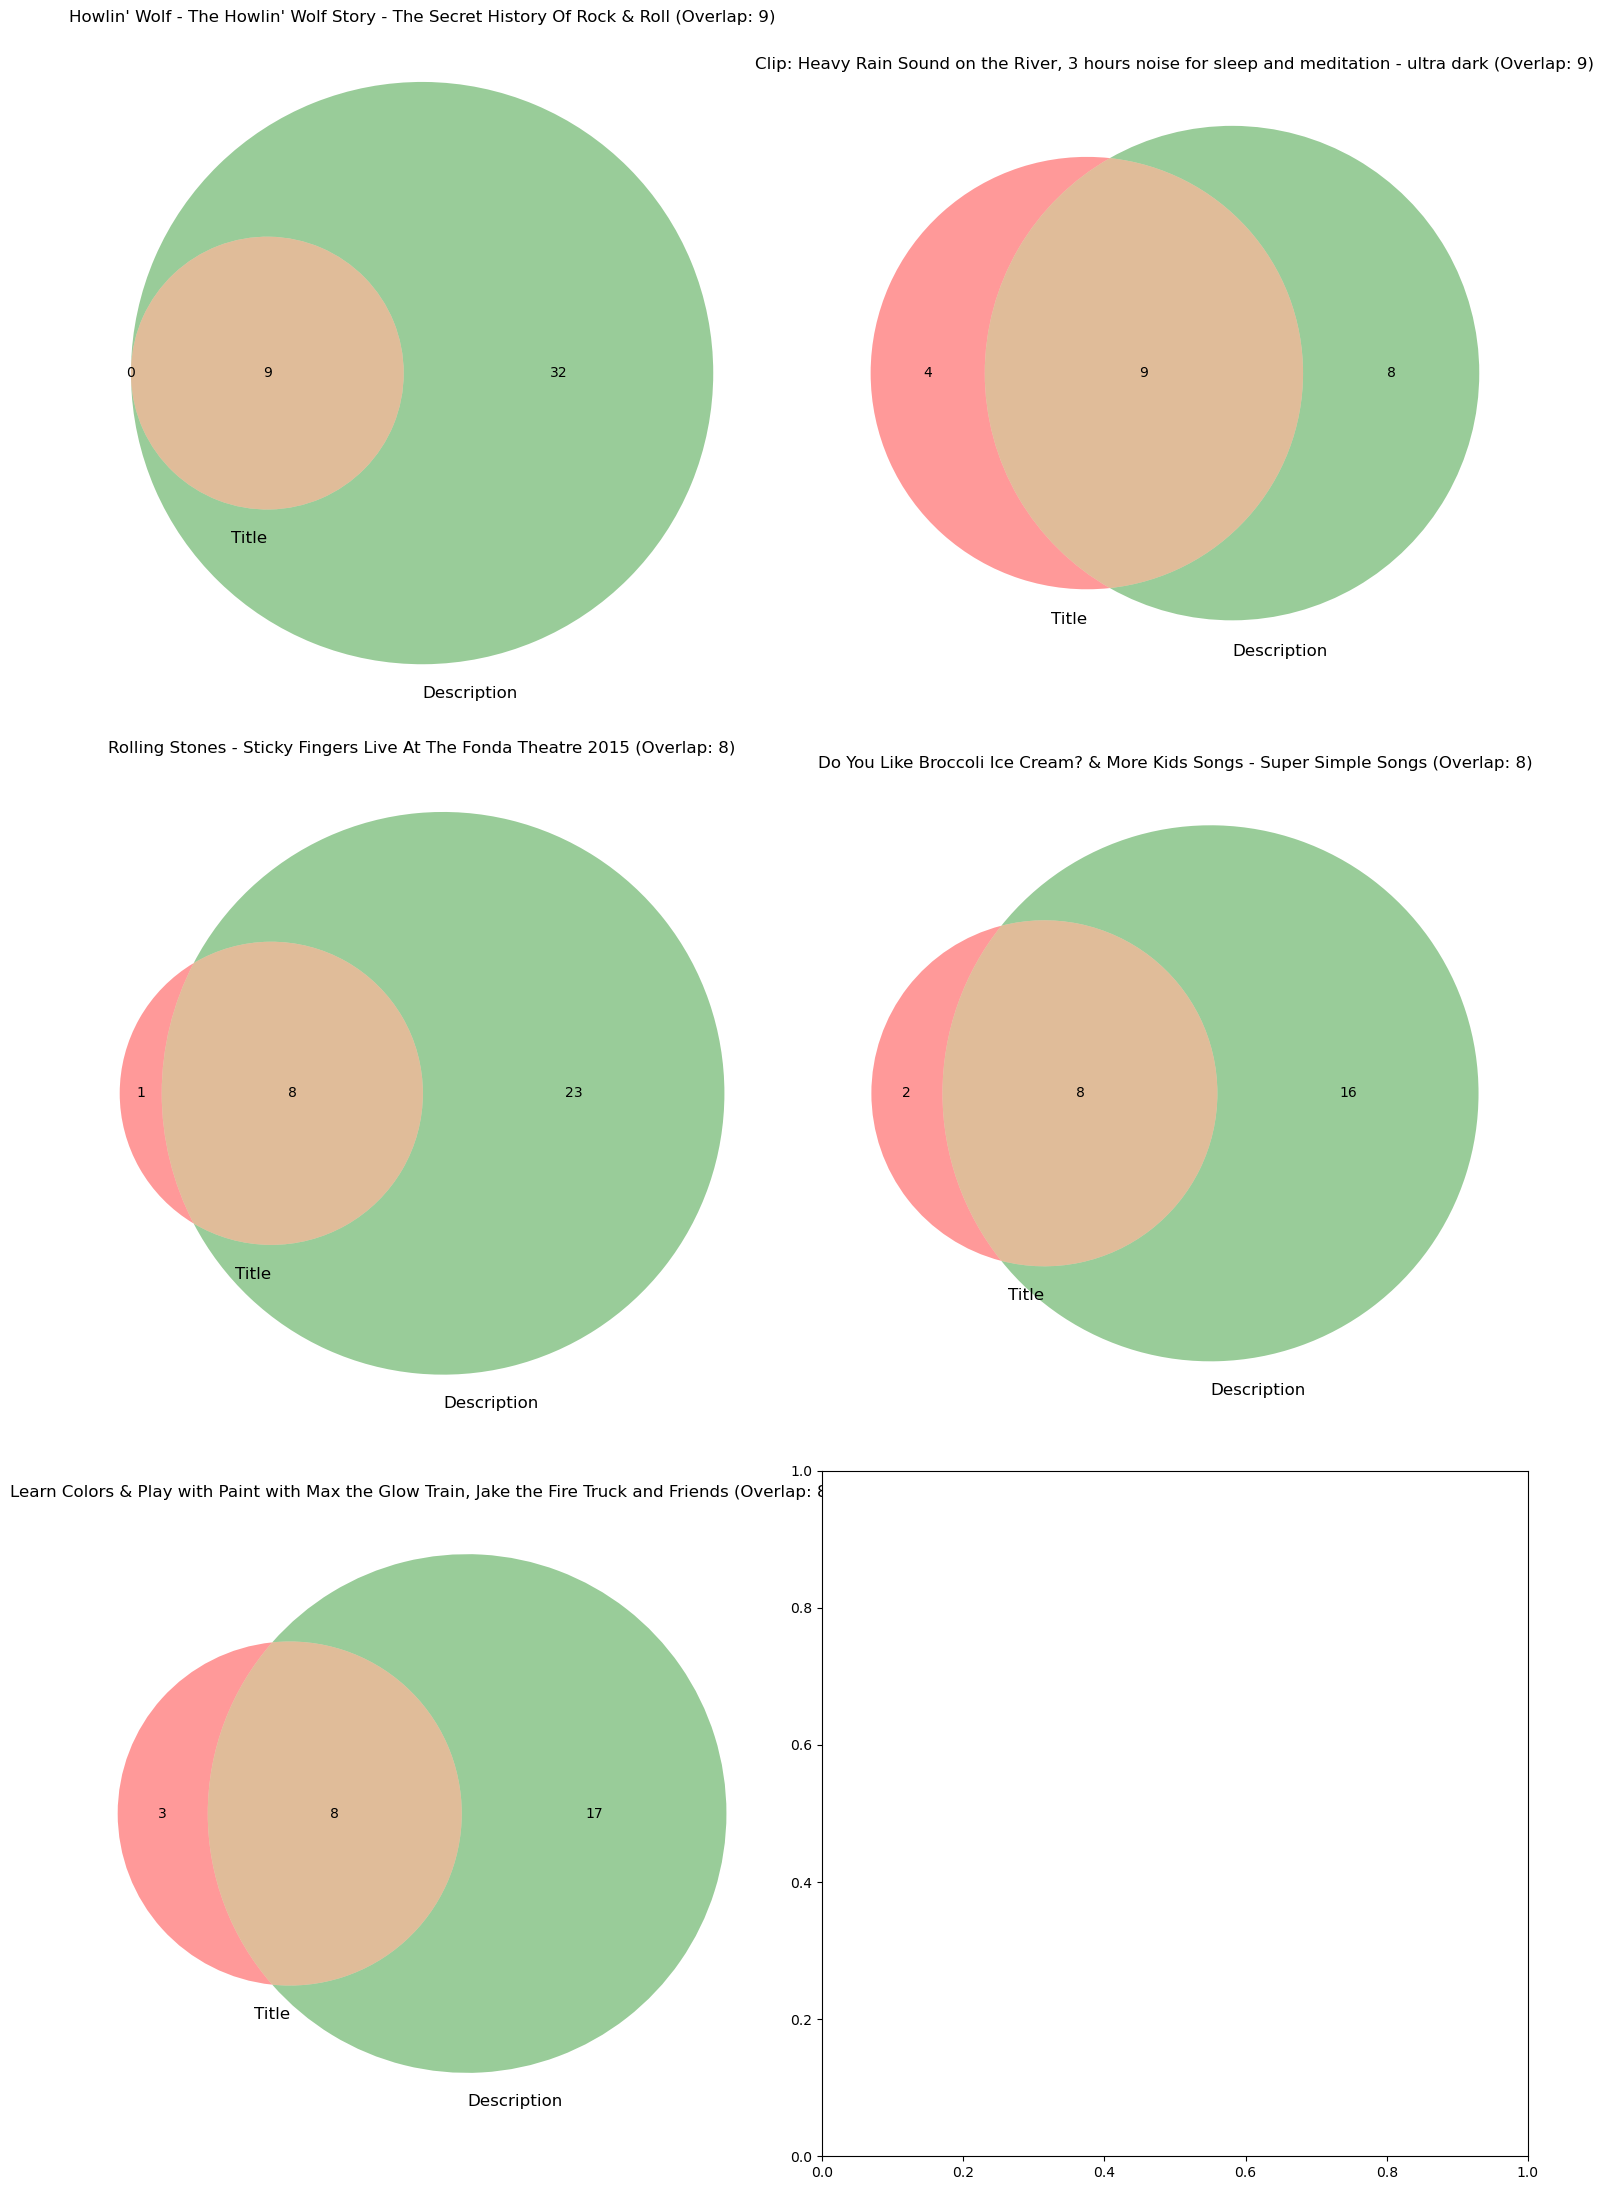

In [87]:
# Function to preprocess text: remove stopwords and split
def preprocess(text):
    return set(word for word in text.lower().split() if word not in ENGLISH_STOP_WORDS)

# Calculate keyword overlap
data['title_keywords'] = data['title'].apply(preprocess)
data['description_keywords'] = data['description'].apply(preprocess)
data['overlap_size'] = data.apply(lambda row: len(row['title_keywords'] & row['description_keywords']), axis=1)

# Sort by overlap size and select top 5
top_movies = data.sort_values(by='overlap_size', ascending=False).head(5)

# Plot Venn diagrams for the top 5 movies
fig, axs = plt.subplots(3, 2, figsize=(15, 22))
axs = axs.flatten()

for i, row in enumerate(top_movies.itertuples()):
    venn2([row.title_keywords, row.description_keywords], set_labels=('Title', 'Description'), ax=axs[i])
    axs[i].set_title(f'{row.title} (Overlap: {row.overlap_size})')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Slope Chart

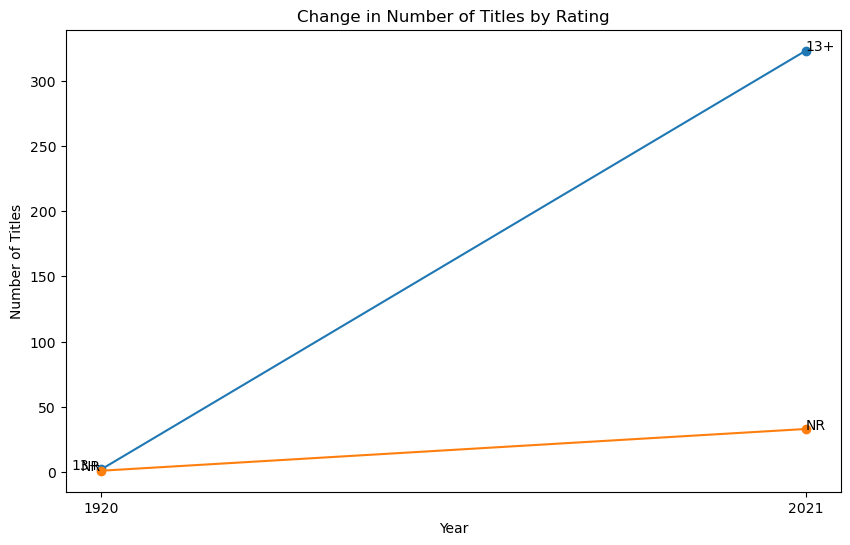

In [97]:
# Prepare data for slope chart
earliest_year_data = data[data['release_year'] == data['release_year'].min()].groupby('rating')['show_id'].count().reset_index()
latest_year_data = data[data['release_year'] == data['release_year'].max()].groupby('rating')['show_id'].count().reset_index()
slope_data = pd.merge(earliest_year_data, latest_year_data, on='rating', suffixes=('_earliest', '_latest'))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for i, row in slope_data.iterrows():
    ax.plot([1, 2], [row['show_id_earliest'], row['show_id_latest']], marker='o')
    ax.text(1, row['show_id_earliest'], row['rating'], horizontalalignment='right')
    ax.text(2, row['show_id_latest'], row['rating'], horizontalalignment='left')

ax.set_xticks([1, 2])
ax.set_xticklabels([data['release_year'].min(), data['release_year'].max()])
ax.set_title('Change in Number of Titles by Rating')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Titles')
plt.show()

Slope Chart illustrates the evolution in the quantity of media content by two specific ratings, '13+' and 'NR' (Not Rated), from 1920 to 2021. The blue line, representing the '13+' rating, exhibits a pronounced upward trajectory, indicating a substantial increase in the production of content with this rating over time. In contrast, the orange line for 'NR' (Not Rated) content remains nearly flat, showing little to no change in the volume of unrated content. This visualization effectively highlights the shifting trends in media ratings, suggesting a growing preference or regulatory push towards content with more defined age-appropriate ratings over the century.

# Sankey Diagram

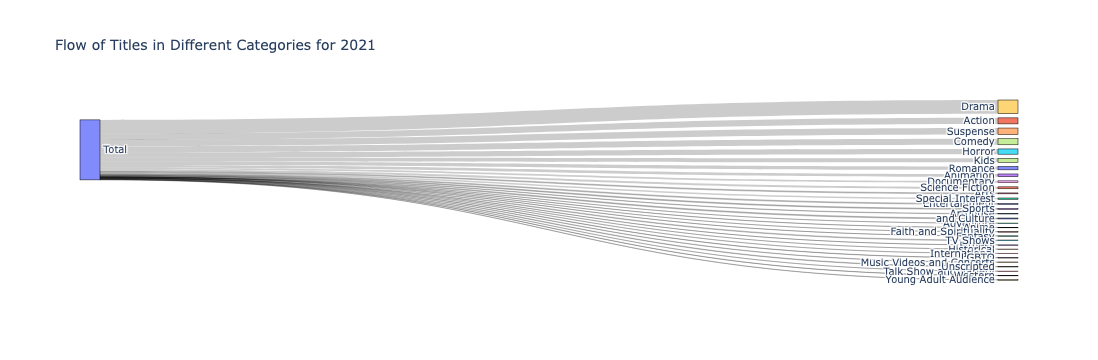

In [103]:
# Prepare data: Counting titles per category for the most recent year
recent_data = data[data['release_year'] == data['release_year'].max()]
category_counts = recent_data['listed_in'].str.get_dummies(sep=', ').sum().reset_index()
category_counts.columns = ['Category', 'Count']

# Building nodes and links for Sankey diagram
labels = list(category_counts['Category'])  # Categories as labels
source = [0] * len(labels)  # All categories originate from a single source
target = list(range(1, len(labels)+1))  # Each category is a target
values = list(category_counts['Count'])

# Creating the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Total'] + labels  # Adding a total source node
    ),
    link = dict(
      source = source,  # indices correspond to labels
      target = target,
      value = values
    ))])

fig.update_layout(title_text=f"Flow of Titles in Different Categories for {data['release_year'].max()}", font_size=10)
fig.show()

Sankey Diagram provides a visual representation of the distribution of titles across various media categories in 2021. Originating from a single node labeled "Total," the diagram uses multiple streams to depict the allocation of titles to different genres such as Drama, Action, and Comedy, among others. Each stream's width is proportional to the number of titles in that category, offering a clear, quantitative comparison of genre popularity. The color coding further distinguishes each genre, enhancing the visualization's readability and facilitating a quick assessment of the relative contribution of each genre to the total media offerings for the year. This diagram effectively uses visual flow to illustrate the diversity and proportion of media categories within the dataset. 